# Welcome to the Tequila Calculator Tutorial.

In this tutorial, you will learn how to create a quantum circuit that simulates addition using Tequila. We also compare the performance of various backends that Tequila uses. We hope you enjoy

## Step 1: Install Tequila
Run this cell to install Tequila on your device.

In [ ]:
pip install git+https://github.com/aspuru-guzik-group/tequila.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/aspuru-guzik-group/tequila.git to /tmp/pip-req-build-bew3domh
  Running command git clone -q https://github.com/aspuru-guzik-group/tequila.git /tmp/pip-req-build-bew3domh
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 45.6 MB/s 
     |████████████████████████████████| 451 kB 75.6 MB/s 
     |████████████████████████████████| 1.8 MB 40.9 MB/s 
     |████████████████████████████████| 541 kB 60.3 MB/s 
  Created wheel for tequila-basic: filename=tequila_basic-1.7.0-py3-none-any.whl size=251972 sha256=153d62e37162d3a5efe5ead425ef33a85444c80c7b33e1cd724a164f9aee6e06
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1rprifi/wheels/1d/22/ed/b52275443f28fbfe5dc0ed6e9637b777b241af74b9db038d2b
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=1f3f1d038193c22129da5bdc7c745

## Step 2:

Install Qiskit on your device as well. Since it is one of the simulators we will use.

In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 19.9 MB/s 
     |████████████████████████████████| 18.0 MB 270 kB/s 
     |████████████████████████████████| 240 kB 40.6 MB/s 
     |████████████████████████████████| 198 kB 41.4 MB/s 
     |████████████████████████████████| 112 kB 22.4 MB/s 
     |████████████████████████████████| 54 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 8.5 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 943 kB 53.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 48.1 MB/s 
     |████████████████████████████████| 112 kB 52.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.2-py3-none-any.whl size=11933 sha256=d01e5a2e3b2b3334e83b5f23206c5263dc4aefdd76f605b16c7830cda3a0df42
  S

## Step 3: Import Statements

Let's import numpy and tequila in a Python-friendly way.

In [ ]:
import tequila as tq
import numpy
from numpy import pi
tq.show_available_simulators()

backend         | wfn        | sampling   | noise      | installed 
--------------------------------------------------------------------
qulacs_gpu      | False      | False      | False      | False     
qulacs          | True       | True       | True       | True      
qibo            | False      | False      | False      | False     
qiskit          | True       | True       | True       | True      
cirq            | True       | True       | True       | True      
pyquil          | False      | False      | False      | False     
symbolic        | True       | False      | False      | True      
qlm             | False      | False      | False      | False     


## Step 4:  2 Digit Addition Circuit 

Below is the generalized circuit for addition (where the input can be any value of 2 digits).

In [ ]:
#establish variable values here, q_0, q_1 are ones digits, q_2, q_3 are tens digits
qc_two = tq.gates.X(0)
qc_two = qc_two + tq.gates.X(1)
qc_two = qc_two + tq.gates.X(3)

qc_two = qc_two + tq.gates.CX(0, 4)
qc_two = qc_two + tq.gates.CX(1, 4)
qc_two = qc_two + tq.gates.Toffoli(0,1,5)

qc_two = qc_two + tq.gates.CX(2, 6)
qc_two = qc_two + tq.gates.CX(3, 6)
qc_two = qc_two + tq.gates.Toffoli(2,3,7)
qc_two = qc_two + tq.gates.Toffoli(5,6,8)
qc_two = qc_two + tq.gates.CX(5, 6)
qc_two = qc_two + tq.gates.X(7)
qc_two = qc_two + tq.gates.X(8)
qc_two = qc_two + tq.gates.Toffoli(7, 8, 9)
qc_two = qc_two + tq.gates.X(9)

tq.draw(qc_two)
measurements = tq.simulate(qc_two, backend='cirq')
#list of 100s, 10s, 1s quibit values
measurement = [str(measurements)[-8], str(measurements)[-6], str(measurements)[-3]]
measurement.reverse()
print(str(measurements))
print(measurement)

      ┌──┐   ┌──┐   ┌──┐
0: ────X──────@────────────@───────────────────
              │            │
1: ────X──────┼──────@─────@───────────────────
              │      │     │
2: ─────@─────┼──────┼@────┼───────────────────
        │     │      ││    │
3: ────X┼─────┼@─────┼@────┼───────────────────
        │     ││     ││    │
4: ─────┼─────X┼─────X┼────┼───────────────────
        │      │      │    │
5: ─────┼──────┼──────┼────X───@───@───────────
        │      │      │        │   │
6: ─────X──────X──────┼────────@───X───────────
                      │        │
7: ───────────────────X────X───┼───────@───────
                               │       │
8: ────────────────────────────X───X───@───────
                                       │
9: ────────────────────────────────────X───X───
      └──┘   └──┘   └──┘
+1.0000|1101010101> 
['1', '0', '0']


In [ ]:
tq.draw(qc_two)

      ┌──┐   ┌──┐   ┌──┐
0: ────X──────@────────────@───────────────────
              │            │
1: ────X──────┼──────@─────@───────────────────
              │      │     │
2: ─────@─────┼──────┼@────┼───────────────────
        │     │      ││    │
3: ────X┼─────┼@─────┼@────┼───────────────────
        │     ││     ││    │
4: ─────┼─────X┼─────X┼────┼───────────────────
        │      │      │    │
5: ─────┼──────┼──────┼────X───@───@───────────
        │      │      │        │   │
6: ─────X──────X──────┼────────@───X───────────
                      │        │
7: ───────────────────X────X───┼───────@───────
                               │       │
8: ────────────────────────────X───X───@───────
                                       │
9: ────────────────────────────────────X───X───
      └──┘   └──┘   └──┘


''

## Step 6: Detailed Generalized Circuit for Any Digit Addition

For more details on how this circuit works, see https://averyparkinson23.medium.com/simulating-a-calculator-using-qiskit-e2a95fff179c

In [ ]:
def generalTwoDigit(x, y, sim):
  abc = tq.gates.X(0) + tq.gates.X(0)
  for i in range(len(x)):
    i = len(x) - 1 - i
    if x[i] == 1:
      abc = qc_two + tq.gates.X(2*i)
  for j in range(len(y)):
    i = len(y) - 1 - i
    if y[i] == 1:
      abc = qc_two + tq.gates.X(2*i+1)
  abc = abc + tq.gates.CX(0, 4)
  abc = abc + tq.gates.CX(1, 4)
  abc = abc + tq.gates.Toffoli(0,1,5)

  abc = abc + tq.gates.CX(2, 6)
  abc = abc + tq.gates.CX(3, 6)
  abc = abc + tq.gates.Toffoli(2,3,7)
  abc = abc + tq.gates.Toffoli(5,6,8)
  abc = abc + tq.gates.CX(5, 6)
  abc = abc + tq.gates.X(7)
  abc = abc + tq.gates.X(8)
  abc = abc + tq.gates.Toffoli(7, 8, 9)
  abc = abc + tq.gates.X(9)
  tq.draw(abc)
  measurements = tq.simulate(abc, backend = sim)
  #list of 100s, 10s, 1s quibit values
  measurement = [str(measurements)[-8], str(measurements)[-6], str(measurements)[-3]]
  measurement.reverse()
  #print(str(measurements))
  #print("Backend =", sim)
  return (''.join(measurement))   

print(generalTwoDigit([0,1], [1, 0], "qiskit"))    


      ┌──┐   ┌──┐   ┌──┐       ┌──┐       ┌──┐       ┌──┐
0: ────X──────@────────────@─────@─────────@────────────────────────────
              │            │     │         │
1: ────X──────┼──────@─────@────X┼────@────@────────────────────────────
              │      │     │     │    │    │
2: ─────@─────┼──────┼@────┼─────┼────┼────┼@─────────@─────────────────
        │     │      ││    │     │    │    ││         │
3: ────X┼─────┼@─────┼@────┼─────┼────┼────┼┼────@────@─────────────────
        │     ││     ││    │     │    │    ││    │    │
4: ─────┼─────X┼─────X┼────┼─────X────X────┼┼────┼────┼─────────────────
        │      │      │    │               ││    │    │
5: ─────┼──────┼──────┼────X────@─────@────X┼────┼────┼@────@───────────
        │      │      │         │     │     │    │    ││    │
6: ─────X──────X──────┼─────────@─────X─────X────X────┼@────X───────────
                      │         │                     ││
7: ───────────────────X────X────┼──────────@──────────

## Step 7: Evaluate Runtime on Different Backends
Now, let's evaluate the runtime of our algorithm on Qiskit, Cirq, and Qulacs

In [ ]:
import time
import random

# get the start time
st = time.time()

# Generate random inputs x and y
for i in range(1000):
  x = [random.randint(0, 1), random.randint(0, 1)]
  y = [random.randint(0, 1), random.randint(0, 1)]
  # main program
  generalTwoDigit(x, y, "cirq")

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 66.15482687950134 seconds


# Runtime Comparison (seconds):

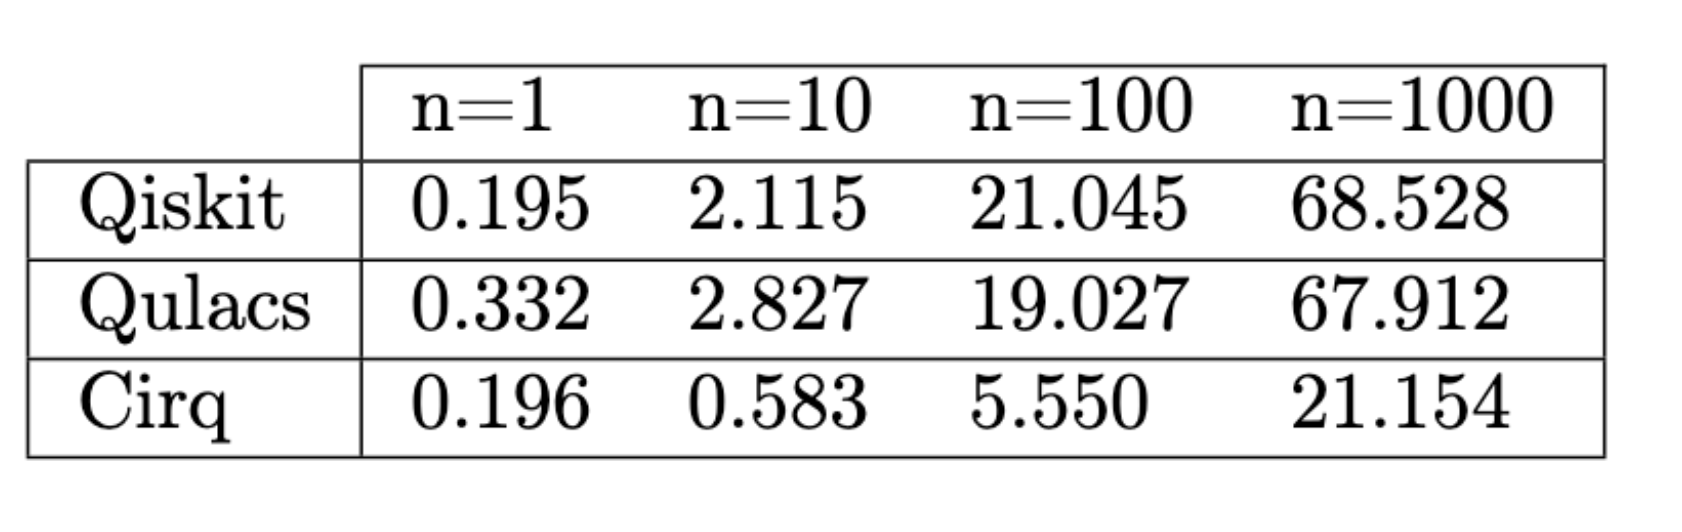